<a href="https://colab.research.google.com/github/rvprieto/ML-recomenda-o---Day7-DataExpert/blob/main/Day7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Bibliotecas

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')


#Datasets

In [2]:
order_itens = pd.read_csv('/content/DNC_order_items_dataset.csv', index_col=0)
order_reviews = pd.read_csv('/content/DNC_order_reviews_dataset.csv', index_col=0)
orders = pd.read_csv('/content/DNC_orders_dataset.csv', index_col=0)
products = pd.read_csv('/content/DNC_products_dataset.csv',index_col=0)

#Analise exploratória

##order_itens

In [3]:
order_itens.sample(5)

,order_id,order_item_id,product_id,price
84870,c0d98bbbc820c00ab877fbb053b1e517,1,235e0d56841710b62daf088840a96ba8,110.00
39774,5a80f55b30d5104aec28b1bc6b59b796,1,7faa2f80dd4c483a89f204c073c5b447,105.00
71033,a2115aed0dfabe789753c37481ea79d2,1,d4ad9721bda56413600c43c11006cb78,59.00
17996,293d3c2a058c0395d19e7d1a4aa87f41,1,bbaef2eadf31fe3ea6702077398be06c,56.99
62869,8f83b7fcba464b677274cb8fcf22eef8,1,df64236f60ba2eb87cfd76fd7cc73198,195.00


In [4]:
order_itens.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112650 entries, 0 to 112649
Data columns (total 4 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   order_id       112650 non-null  object 
 1   order_item_id  112650 non-null  int64  
 2   product_id     112650 non-null  object 
 3   price          112650 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.3+ MB


In [5]:
nunique_product =order_itens['product_id'].nunique()

In [6]:
order_itens.duplicated().sum()

0

In [7]:
order_itens['order_id'].duplicated().sum()

13984

##order_reviews

In [8]:
order_reviews.sample(5)

,review_id,order_id,review_score
22031,e2f51fe8af7a172398bdc834158f1891,67fc5f606ae3826fe2e204222407f87d,4
20015,5f5654a69bd184101f469579a75232b5,ec02fec9423ae39b2f91ff964bdfd87c,2
53266,6ee3c2b9df4339d749e91688ccc57dcc,1d748fa1652f04b064b6cf65739b04dc,1
21379,2958b2a3fcdd2c8eedd0062039516236,c2b4140e1e7ac4f534dfc6713cd6b93a,5
75296,c26eee46d7a3535d0d583838be2e0481,a476fb0537849039cb122034488f8ee4,5


In [9]:
order_reviews.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99224 entries, 0 to 99223
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   review_id     99224 non-null  object
 1   order_id      99224 non-null  object
 2   review_score  99224 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 3.0+ MB


In [10]:
order_reviews.duplicated().sum()

0

In [11]:
order_reviews['review_score'].value_counts()

5    57328
4    19142
1    11424
3     8179
2     3151
Name: review_score, dtype: int64

##orders_dataset

In [12]:
orders.sample(5)

,order_id,customer_id,order_status
80395,2cd4d457a1de3adcdb9d8237cb975c6d,8e6d1663d54c1c7aac1cb0bae73df8b4,delivered
62242,a97fd57e9692389b794fd4c3a328f68f,aadd0bcb192e7beb0eba93b2adc144d3,delivered
56903,34b6e91cc3c7e9bff425f3be9f5b0b98,6163b8118780f6c45ed62592c11dceab,delivered
56186,3cbdfe7eddec3865455541546f081546,36c3e8a1f8e150fde4a148578d99a5e1,delivered
79178,6f0bbdaf91746e96253d10fe7e374f7d,3071ce9d57b701079af6747a0d89b13b,invoiced


In [13]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99441 entries, 0 to 99440
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   order_id      99441 non-null  object
 1   customer_id   99441 non-null  object
 2   order_status  99441 non-null  object
dtypes: object(3)
memory usage: 3.0+ MB


In [14]:
orders['customer_id'].nunique()

99441

In [15]:
(orders['order_status'].value_counts(dropna=False)/orders.shape[0])*100

delivered      97.020344
shipped         1.113223
canceled        0.628513
unavailable     0.612423
invoiced        0.315765
processing      0.302692
created         0.005028
approved        0.002011
Name: order_status, dtype: float64

In [16]:
orders.duplicated().sum()

0

##products

In [17]:
products.sample(5)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_weight_g,product_length_cm,product_height_cm,product_width_cm
639,37d2e3656244fd840ebd0460360455cd,papelaria,36.0,215.0,700.0,45.0,10.0,31.0
23934,5aad359a63cbb4fc35ead44346a3eeb4,moveis_decoracao,24.0,457.0,100.0,80.0,10.0,60.0
16790,e852196fab4b6dfb1fdafdc693b7dad5,fashion_bolsas_e_acessorios,59.0,650.0,400.0,43.0,16.0,27.0
7046,eaa3fffe22b0b5efe02db64ab9d3bf84,moveis_colchao_e_estofado,30.0,2073.0,1850.0,41.0,21.0,21.0
21743,7194ad9c6144dbbc1f3d4c389222035a,beleza_saude,40.0,2371.0,2150.0,35.0,11.0,23.0


In [18]:
products.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32951 entries, 0 to 32950
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_weight_g            32949 non-null  float64
 5   product_length_cm           32949 non-null  float64
 6   product_height_cm           32949 non-null  float64
 7   product_width_cm            32949 non-null  float64
dtypes: float64(6), object(2)
memory usage: 2.3+ MB


In [19]:
products.isnull().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [20]:
products['product_category_name'].value_counts(dropna=False)

cama_mesa_banho                  3029
esporte_lazer                    2867
moveis_decoracao                 2657
beleza_saude                     2444
utilidades_domesticas            2335
                                 ... 
casa_conforto_2                     5
fashion_roupa_infanto_juvenil       5
pc_gamer                            3
seguros_e_servicos                  2
cds_dvds_musicais                   1
Name: product_category_name, Length: 74, dtype: int64

In [21]:
products.duplicated().sum()

0

#Estruturação de dados

In [22]:
df_rd = orders.merge(order_itens, how='left', on='order_id')

In [23]:
df_rd = df_rd.merge(order_reviews, how='left', on='order_id')

In [24]:
df_rd = df_rd.merge(products, how='left', on='product_id')

In [25]:
df_rd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114092 entries, 0 to 114091
Data columns (total 15 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   order_id                    114092 non-null  object 
 1   customer_id                 114092 non-null  object 
 2   order_status                114092 non-null  object 
 3   order_item_id               113314 non-null  float64
 4   product_id                  113314 non-null  object 
 5   price                       113314 non-null  float64
 6   review_id                   113131 non-null  object 
 7   review_score                113131 non-null  float64
 8   product_category_name       111702 non-null  object 
 9   product_name_lenght         111702 non-null  float64
 10  product_description_lenght  111702 non-null  float64
 11  product_weight_g            113296 non-null  float64
 12  product_length_cm           113296 non-null  float64
 13  product_height

#Tratamentos

In [26]:
df_rd.isnull().sum()

order_id                         0
customer_id                      0
order_status                     0
order_item_id                  778
product_id                     778
price                          778
review_id                      961
review_score                   961
product_category_name         2390
product_name_lenght           2390
product_description_lenght    2390
product_weight_g               796
product_length_cm              796
product_height_cm              796
product_width_cm               796
dtype: int64

In [27]:
df_rd=df_rd.dropna(axis=0)

In [28]:
df_rd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110773 entries, 0 to 114091
Data columns (total 15 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   order_id                    110773 non-null  object 
 1   customer_id                 110773 non-null  object 
 2   order_status                110773 non-null  object 
 3   order_item_id               110773 non-null  float64
 4   product_id                  110773 non-null  object 
 5   price                       110773 non-null  float64
 6   review_id                   110773 non-null  object 
 7   review_score                110773 non-null  float64
 8   product_category_name       110773 non-null  object 
 9   product_name_lenght         110773 non-null  float64
 10  product_description_lenght  110773 non-null  float64
 11  product_weight_g            110773 non-null  float64
 12  product_length_cm           110773 non-null  float64
 13  product_height

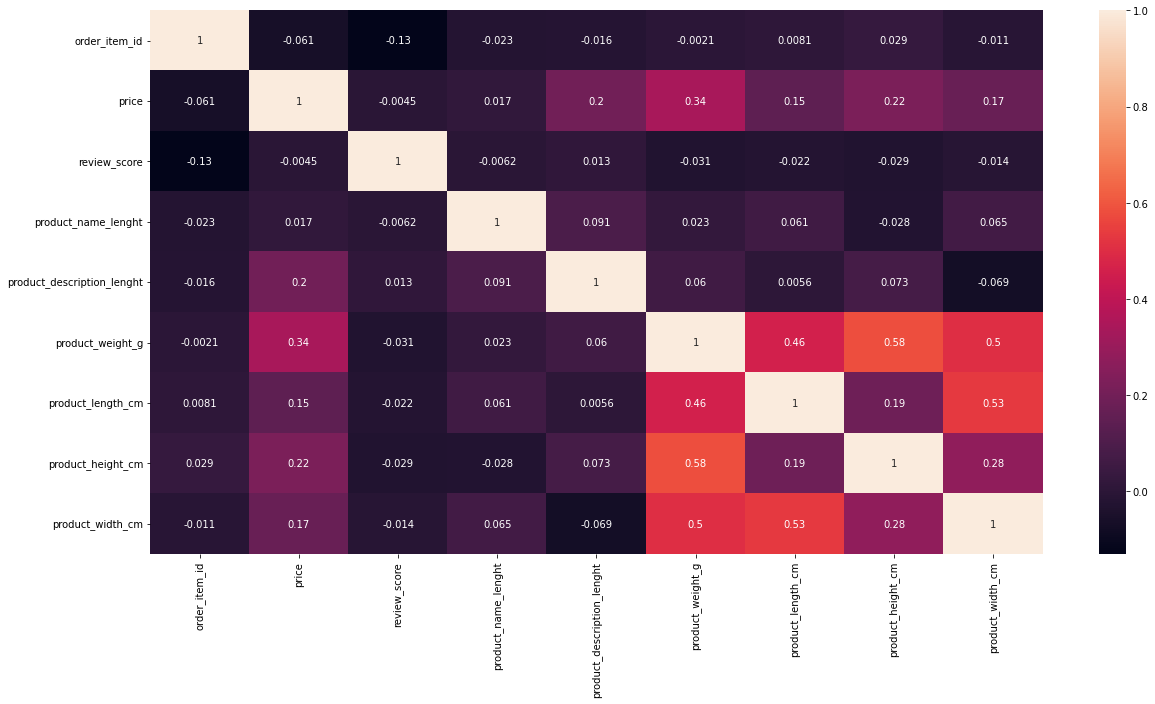

In [29]:
plt.figure(figsize= (20,10))
sns.heatmap(data=df_rd.corr(), annot=True)

In [30]:
product_count=df_rd.groupby(by='product_id',as_index=False).agg({'order_id':pd.Series.nunique}).rename(columns={'order_id':'order_count'})
shop_count=product_count.set_index('product_id')

top10_products=shop_count.sort_values('order_count',ascending=False).head(10)
top10_products=top10_products.reset_index()

top10_products

,product_id,order_count
0,99a4788cb24856965c36a24e339b6058,458
1,aca2eb7d00ea1a7b8ebd4e68314663af,429
2,422879e10f46682990de24d770e7f83d,351
3,d1c427060a0f73f6b889a5c7c61f2ac4,320
4,389d119b48cf3043d311335e499d9c6b,310
5,53b36df67ebb7c41585e8d54d6772e08,303
6,368c6c730842d78016ad823897a372db,289
7,53759a2ecddad2bb87a079a1f1519f73,285
8,154e7e31ebfa092203795c972e5804a6,268
9,2b4609f8948be18874494203496bc318,259


In [31]:
category_count=df_rd.groupby(by='product_category_name',as_index=False).agg({'order_id':pd.Series.nunique}).rename(columns={'order_id':'order_count'})
shop_count=category_count.set_index('product_category_name')

top10_category=shop_count.sort_values('order_count',ascending=False).head(10)
top10_category=top10_category.reset_index()


top10_category

,product_category_name,order_count
0,cama_mesa_banho,9313
1,beleza_saude,8771
2,esporte_lazer,7669
3,informatica_acessorios,6649
4,moveis_decoracao,6398
5,utilidades_domesticas,5843
6,relogios_presentes,5576
7,telefonia,4168
8,automotivo,3877
9,brinquedos,3853


In [32]:
product_rated=df_rd.groupby(by='product_id',as_index=False).agg({'review_score':np.mean}).rename(columns={'review_score':'soma_rate'})
shop_count=product_rated.set_index('product_id')

top10000_avg_products_score=shop_count.sort_values('soma_rate',ascending=False).head(10000) 
#Pegando 10000 linhas para não exceder o limite de memoria ram do colab
top10000_avg_products_score=top10000_avg_products_score.reset_index()

top10000_avg_products_score.head()

,product_id,soma_rate
0,00066f42aeeb9f3007548bb9d3f33c38,5.0
1,6000cda32a1e7f6919ae1fcdf1d6259a,5.0
2,5fe490e61e7a37f2f0d1ad1771ac027d,5.0
3,c6ab810300ecce0784a66d36fcb5560f,5.0
4,c6ab3d8f4227913c4fa99e94ef84aa70,5.0


In [33]:
#10 categorias melhor classificados

product_category_bestreviews=df_rd.groupby(by='product_category_name',as_index=False).agg({'review_score':np.sum}).rename(columns={'review_score':'review_sum'})
shop_count=product_category_bestreviews.set_index('product_category_name')

top10_products_category_review=shop_count.sort_values('review_sum',ascending=False).head(10)
top10_products_category_review=top10_products_category_review.reset_index()

top10_products_category_review

,product_category_name,review_sum
0,cama_mesa_banho,43386.0
1,beleza_saude,39957.0
2,esporte_lazer,35493.0
3,moveis_decoracao,32520.0
4,informatica_acessorios,30853.0
5,utilidades_domesticas,28154.0
6,relogios_presentes,23914.0
7,telefonia,17828.0
8,ferramentas_jardim,17501.0
9,automotivo,17128.0


#Matriz de similaridade

In [34]:
df_rd.shape, df_rd['product_id'].nunique(), df_rd['product_category_name'].nunique()

((110773, 15), 32183, 73)

In [35]:
matriz_similaridade = df_rd[df_rd["product_id"].isin(top10000_avg_products_score["product_id"])] \
  .pivot_table(index="product_id", columns="product_category_name", values="review_score").fillna(0)

matriz_similaridade.shape

(10000, 68)

In [36]:
from sklearn.metrics.pairwise import cosine_similarity
cos_item = cosine_similarity(matriz_similaridade)

print(cos_item)
cos_item.shape

[[1. 0. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [1. 0. 0. ... 0. 0. 1.]]


(10000, 10000)

#Modelagem

In [37]:
def recomendar(product_id):
  print(f"Produto observado: {product_id}.\n")
  try:
    produto_x = matriz_similaridade.index.tolist().index(product_id)
    top10_recomendados = np.argsort(-cos_item[produto_x])[1:11]
    print(f"Retornando os 10 produtos mais similares de: {product_id}.")
    return matriz_similaridade.index[top10_recomendados].tolist()
  except ValueError as e:
    print(f"{product_id}, não está incluso na matriz de recomendação. Retornando os 10 comprados")
    return top10_products['product_id'].tolist()

In [38]:
product_id = "00066f42aeeb9f3007548bb9d3f33c38"
produtos_similares = recomendar(product_id)

produtos_similares

Produto observado: 00066f42aeeb9f3007548bb9d3f33c38.

Retornando os 10 produtos mais similares de: 00066f42aeeb9f3007548bb9d3f33c38.


['6a4a789c85b5704975300632152e595c',
 '69918318f27e9853c6d2a68906018a14',
 '66ef20ad226145a624f8d7b7821d8d5a',
 '65dee5bfb53947891fc47bf9a850a111',
 '65586e7ecd256d15d4360a6854d15b14',
 '64c8ed0f7f4b571f9aa5f2488999d316',
 '63acd71fee320fca91e3740e7f49f19e',
 '6292e8c74db1d4defdbd8244c1101bb6',
 '624a71194ff2a5badf71b7870f88f24f',
 '61d83b8d80a61b5fd688471b5b273b5f']

In [39]:
product_id = "f6bbece0c618d7313bbaf6fc919149b8"
produtos_similares = recomendar(product_id)

produtos_similares

Produto observado: f6bbece0c618d7313bbaf6fc919149b8.

f6bbece0c618d7313bbaf6fc919149b8, não está incluso na matriz de recomendação. Retornando os 10 comprados


['99a4788cb24856965c36a24e339b6058',
 'aca2eb7d00ea1a7b8ebd4e68314663af',
 '422879e10f46682990de24d770e7f83d',
 'd1c427060a0f73f6b889a5c7c61f2ac4',
 '389d119b48cf3043d311335e499d9c6b',
 '53b36df67ebb7c41585e8d54d6772e08',
 '368c6c730842d78016ad823897a372db',
 '53759a2ecddad2bb87a079a1f1519f73',
 '154e7e31ebfa092203795c972e5804a6',
 '2b4609f8948be18874494203496bc318']

In [40]:
product_id = "item_que_não_existe"
produtos_similares = recomendar(product_id)

produtos_similares

Produto observado: item_que_não_existe.

item_que_não_existe, não está incluso na matriz de recomendação. Retornando os 10 comprados


['99a4788cb24856965c36a24e339b6058',
 'aca2eb7d00ea1a7b8ebd4e68314663af',
 '422879e10f46682990de24d770e7f83d',
 'd1c427060a0f73f6b889a5c7c61f2ac4',
 '389d119b48cf3043d311335e499d9c6b',
 '53b36df67ebb7c41585e8d54d6772e08',
 '368c6c730842d78016ad823897a372db',
 '53759a2ecddad2bb87a079a1f1519f73',
 '154e7e31ebfa092203795c972e5804a6',
 '2b4609f8948be18874494203496bc318']